# Hough Lines

### Import resources and display the image

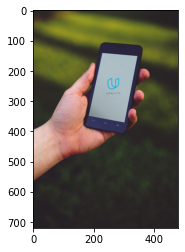

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

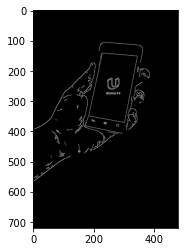

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

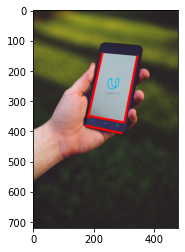

In [16]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 0.5*1
theta = 0.5*np.pi/180 

threshold = 60
min_line_length = 105 #15,25  # line shorter than that are rejected; kind of noise threshold eg. 1 pixel noise
max_line_gap = 5   # 5      # max allowed gap between 2 two points 

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

# Remarks/My learnings:
- A wonderful [link](https://www.youtube.com/watch?v=XRBc_xkZREg) on hough lines 
    - `points in image space` = `lines in hough space` 
    - `lines in image space` = `points in hough space`   
        - line segment: joins 2 or more points
        - point lying outside of this line segment, its representation in hough space is a line which does not interset at the same point
    - image space (r, theta); hough space: (m,c) space
    - **keywords**: quantization; accumilator array; voting  
    - the quantazied space or discretized space often referred to as (a,b) space
    
    
- similarly: point vs circle 
    - `point in image space` = `circle in hough space` 
    - `circle in image space` = `point in hough space`       


- Amount of Information in image space
    - more information from image space: gradient direction; 
    - less information in image space: do not know the radius that we are looking for; locus is a curve;
    - as constraints decrease becomes less and less useful